Training Data Evaluation Metrics:
True Positives (TP): 50
False Positives (FP): 89
True Negatives (TN): 206
False Negatives (FN): 16
Precision: 0.360
Recall: 0.758
AUC-ROC Score: 0.7814


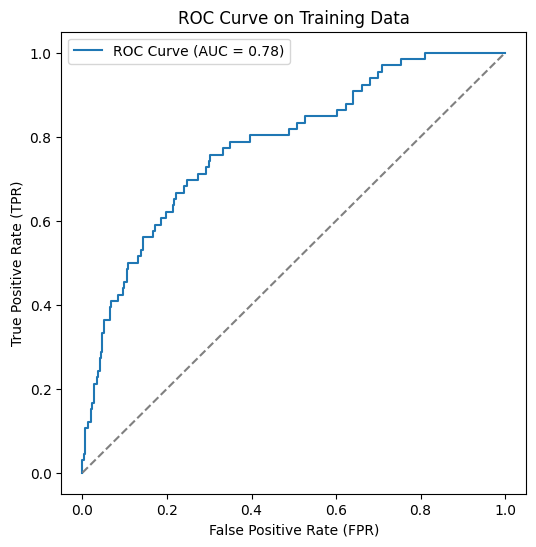

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import joblib
import config

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Load the datasets and models to test
X_train = joblib.load("../data/mutation/X_train.pkl")
y_train = joblib.load("../data/mutation/y_train.pkl")
X_test = joblib.load("../data/mutation/X_test.pkl")
y_test = joblib.load("../data/mutation/y_test.pkl")

model = joblib.load("../models/LASSO_with_mutation")

# Training Data Evaluation Metrics

# Predictions (discrete)
y_train_pred = model.predict(X_train)

print("Training Data Evaluation Metrics:")

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = cm_train.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Precision & Recall
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Continuous scores for AUROC
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_train)[:, 1]
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_train)
else:
    y_scores = y_train_pred  # fallback (not ideal)

# AUROC
roc_auc = roc_auc_score(y_train, y_scores)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_train, y_scores)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve on Training Data")
plt.legend()
plt.show()



Test Data Evaluation Metrics:
True Positives (TP): 11
False Positives (FP): 22
True Negatives (TN): 52
False Negatives (FN): 6
Precision: 0.333
Recall: 0.647
AUC-ROC Score: 0.7695


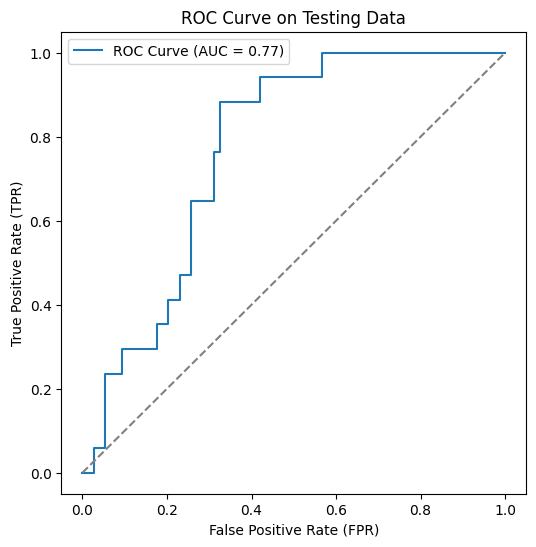

In [2]:
# Testing Data Evaluation Metrics

# Predictions (discrete)
y_test_pred = model.predict(X_test)

print("Test Data Evaluation Metrics:")

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Precision & Recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Continuous scores for AUROC
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)[:, 1]
elif hasattr(model, "decision_function"):
    y_scores = model.decision_function(X_test)
else:
    y_scores = y_test_pred  # fallback (not ideal)

# AUROC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve on Testing Data")
plt.legend()
plt.show()



In [8]:

# Extract final estimator from pipeline
clf = model.named_steps["clf"]

coefs = clf.coef_

# Handle multi-class vs binary
if coefs.ndim > 1:
    coefs = coefs.ravel()

nonzero_features = np.sum(coefs != 0)
print("Number of non-zero features kept by LASSO:", nonzero_features)
zero_features = np.sum(coefs == 0)
print("Number of zero features kept by LASSO:", zero_features)


# If you trained on X with named columns:
feature_names = X_train.columns
nonzero_feature_names = feature_names[coefs != 0]
print("Non-zero feature names:", nonzero_feature_names.tolist())
zero_feature_names = feature_names[coefs == 0]
print("Zeroed feature names:", zero_feature_names.tolist())



Number of non-zero features kept by LASSO: 18120
Number of zero features kept by LASSO: 14
Non-zero feature names: ['clinical__AGE', 'clinical__AJCC_STAGING_EDITION', 'clinical__DAYS_TO_BIRTH', 'clinical__WEIGHT', 'clinical__SUBTYPE_UCEC_CN_LOW', 'clinical__SUBTYPE_UCEC_MSI', 'clinical__SUBTYPE_UCEC_POLE', 'clinical__ICD_10_C54.1', 'clinical__ICD_10_C54.3', 'clinical__ICD_10_C54.9', 'clinical__ICD_O_3_HISTOLOGY_8140/3', 'clinical__ICD_O_3_HISTOLOGY_8310/3', 'clinical__ICD_O_3_HISTOLOGY_8380/3', 'clinical__ICD_O_3_HISTOLOGY_8382/3', 'clinical__ICD_O_3_HISTOLOGY_8441/3', 'clinical__ICD_O_3_HISTOLOGY_8460/3', 'clinical__ICD_O_3_HISTOLOGY_8461/3', 'clinical__PRIOR_DX_Yes', 'clinical__RACE_Asian', 'clinical__RACE_Black or African American', 'clinical__RACE_Native Hawaiian or Other Pacific Islander', 'clinical__RACE_White', 'clinical__RADIATION_THERAPY_Yes', 'clinical__GENETIC_ANCESTRY_LABEL_ADMIX', 'clinical__GENETIC_ANCESTRY_LABEL_AFR', 'clinical__GENETIC_ANCESTRY_LABEL_AFR_ADMIX', 'clinic

In [6]:
preprocessor = joblib.load("../data/mutation/preprocessor.pkl")

# Get the classifier step (assuming you named it 'clf' in the pipeline)
clf = model.named_steps['clf']

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get coefficients (handle multiclass)
coefs = clf.coef_
if coefs.ndim > 1:  # multiclass, shape (n_classes, n_features)
    coefs = np.mean(np.abs(coefs), axis=0)  # average magnitude across classes
else:
    coefs = np.abs(coefs)

# Pair names with coefficients
coef_df = pd.DataFrame({
    "feature": feature_names,
    "weight": coefs
})

# Sort by strongest weights
coef_df = coef_df.sort_values("weight", ascending=False)

print(coef_df.head(20))


                feature    weight
3      clinical__WEIGHT  0.000199
2423     mrna__C9orf103  0.000120
14060        mrna__SMG6  0.000119
5985      mrna__GALNT12  0.000116
5952    mrna__GABARAPL3  0.000114
11240      mrna__PHLDA3  0.000102
9932        mrna__NAA50  0.000101
6401       mrna__GPR158  0.000100
14923        mrna__TCP1  0.000100
7126        mrna__HSPD1  0.000099
2610       mrna__CARD10  0.000099
3990       mrna__CYB5D2  0.000099
11253      mrna__PHYHD1  0.000098
10446        mrna__NRD1  0.000098
4688         mrna__ECE2  0.000098
17287       mrna__ZNF79  0.000097
1616     mrna__C11orf86  0.000097
15381     mrna__TMEM63C  0.000095
16568        mrna__XPO5  0.000094
10586         mrna__NXN  0.000094


In [10]:
import pandas as pd
import numpy as np

# Get coefficients from your trained model
coefs = model.named_steps['clf'].coef_.ravel()
feature_names = model.named_steps['clf'].feature_names_in_

# Put into dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "weight": coefs
})

# Compute absolute weight (influence)
coef_df["abs_weight"] = coef_df["weight"].abs()

# Group by feature type
influence = (
    coef_df.groupby(coef_df["feature"].str.split("__").str[0])["abs_weight"]
    .sum()
    .sort_values(ascending=False)
)

print(influence)


feature
mrna        0.424115
mutation    0.012635
clinical    0.000424
Name: abs_weight, dtype: float64
